<a href="https://colab.research.google.com/github/Aipakazuma/meetup037/blob/master/tensorboard%E3%81%AE%E5%88%A9%E7%94%A8%E3%83%86%E3%82%B9%E3%83%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensorboardの利用テスト

In [1]:
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation
from keras.utils import np_utils


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Using TensorFlow backend.


# tensorboardを使う準備

`localtunnel` というコマンドを使ってトンネルを作る

In [15]:
!npm install -g localtunnel

/tools/node/bin/lt -> /tools/node/lib/node_modules/localtunnel/bin/client
+ localtunnel@1.9.1
added 54 packages from 32 contributors in 2.635s


In [0]:
log_dir = './logs/'

In [0]:
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(log_dir)
)
get_ipython().system_raw('lt --port 6006 >> url.txt 2>&1 &')

In [19]:
!cat url.txt

your url is: https://hot-eel-51.localtunnel.me


便利だ！

# データダウンロード

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 23s 0us/step


# 前処理

In [0]:
# 画像を0-1の範囲で正規化
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# 正解ラベルをOne-Hot表現に変換
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

# モデル構築

In [0]:
model = Sequential()
model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(32))
model.add(Activation('relu'))

model.add(Dense(32))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

# モデル学習

In [5]:
history = model.fit(X_train, y_train, batch_size=128, nb_epoch=20, verbose=1,validation_split=0.1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 45000 samples, validate on 5000 samples
Epoch 1/20
45000/45000 [==============================] - 5s 105us/step - loss: 2.0145 - acc: 0.2560 - val_loss: 1.9149 - val_acc: 0.2974
Epoch 2/20
45000/45000 [==============================] - 3s 58us/step - loss: 1.8797 - acc: 0.3068 - val_loss: 1.8935 - val_acc: 0.3032
Epoch 3/20
45000/45000 [==============================] - 3s 58us/step - loss: 1.8460 - acc: 0.3228 - val_loss: 1.8505 - val_acc: 0.3274
Epoch 4/20
45000/45000 [==============================] - 3s 58us/step - loss: 1.8225 - acc: 0.3338 - val_loss: 1.8693 - val_acc: 0.3176
Epoch 5/20
45000/45000 [==============================] - 3s 58us/step - loss: 1.8106 - acc: 0.3377 - val_loss: 1.8318 - val_acc: 0.3306
Epoch 6/20
45000/45000 [==============================] - 3s 59us/step - loss: 1.8019 - acc: 0.3434 - val_loss: 1.8423 - val_acc: 0.3208
Epoch 7/20
45000/45000 [==============================] - 3s 58us/step - loss: 1.7911 - acc: 0.3463 - val_loss: 1.8113 - val_acc

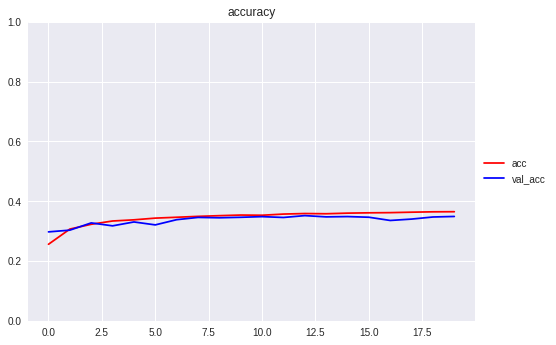

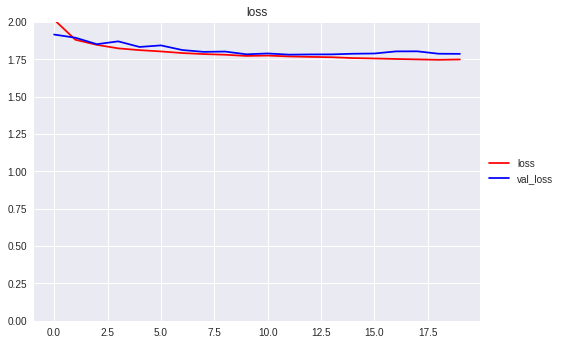

In [6]:
epochs = 20
x = range(epochs)
plt.plot(x, history.history['acc'], label='acc', color='r')
plt.plot(x, history.history['val_acc'], label='val_acc', color='b')
plt.ylim(0.0, 1.0)
plt.title('accuracy')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.plot(x, history.history['loss'], label='loss', color='r')
plt.plot(x, history.history['val_loss'], label='val_loss', color='b')
plt.title('loss')
plt.ylim(0.0, 2.0)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# callbackでtensorboardを読み出す

In [0]:
from keras.callbacks import TensorBoard

In [0]:
tensorboard = TensorBoard(log_dir=log_dir)
callbacks = [tensorboard]

In [0]:
model = Sequential()
model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(32))
model.add(Activation('relu'))

model.add(Dense(32))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
epochs = 50
try:
    history = model.fit(X_train, y_train, epochs=epochs, callbacks=callbacks)
except KeyboardInterrupt:
    tensorboard.writer.close()

Epoch 1/50
50000/50000 [==============================] - 10s 194us/step - loss: 1.9987 - acc: 0.2430
Epoch 2/50
50000/50000 [==============================] - 9s 185us/step - loss: 1.9056 - acc: 0.2896
Epoch 3/50
50000/50000 [==============================] - 9s 185us/step - loss: 1.8808 - acc: 0.3051
Epoch 4/50
50000/50000 [==============================] - 9s 184us/step - loss: 1.8578 - acc: 0.3151
Epoch 5/50
50000/50000 [==============================] - 9s 188us/step - loss: 1.8504 - acc: 0.3179
Epoch 6/50
50000/50000 [==============================] - 9s 186us/step - loss: 1.8393 - acc: 0.3217
Epoch 7/50
50000/50000 [==============================] - 9s 186us/step - loss: 1.8277 - acc: 0.3268
Epoch 8/50
50000/50000 [==============================] - 9s 185us/step - loss: 1.8220 - acc: 0.3299
Epoch 9/50
50000/50000 [==============================] - 9s 188us/step - loss: 1.8185 - acc: 0.3320
Epoch 10/50
50000/50000 [==============================] - 9s 186us/step - loss: 1.8146 - 

動作させている間はTensorboardに動的に書き込みされる